# Social network Analysis Project
### Road Network Analysis around Tokyo Tower in Relation to the Tokyo 2020 Olympic Games Dataset


#### Import the necessary libraries, and read the data from .csv file 

In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
df = pd.read_csv('Tokyo_Edgelist.csv')
Graphtype = nx.Graph()


#### Chech if there is any null value in the data 

In [2]:
df.isnull().any()

XCoord        False
YCoord        False
START_NODE    False
END_NODE      False
EDGE          False
LENGTH        False
dtype: bool

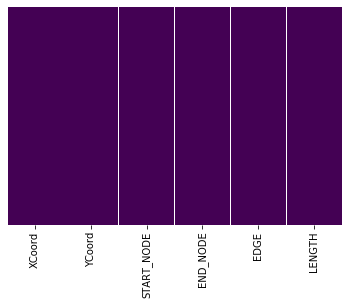

In [3]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

#### Gaining the position of the Tokyo Tower, in the map by Latitude and longitude coordinates that are 35.658581, 139.745438 and convert it to WGS 1984 UTM projected coordinate system,  coordinates that are  X= 386441 and Y=3946806. then grap the area arrounf it. also remove the duplicate rows in the dataframe and make the graph undirected.

In [4]:
Tokyo_Tower_df=df[(df['XCoord']>386000.02) & (df['XCoord']<387000.02) & (df['YCoord']>3946100) & (df['YCoord']<3947000)]
Tokyo_Tower_df

,XCoord,YCoord,START_NODE,END_NODE,EDGE,LENGTH
299633,386945.1400,3946100.771,293042,290989,146521,60.295337
299634,386945.1400,3946100.771,293042,292668,146522,120.604016
299635,386945.1400,3946100.771,293042,295503,147753,113.889406
300061,386871.8538,3946116.391,293473,292939,146737,17.698547
300062,386871.8538,3946116.391,293473,293509,146756,8.508627
...,...,...,...,...,...,...
1027403,386287.7940,3946757.286,1017294,314744,508647,20.910472
1027563,386906.5915,3946920.858,1017577,321783,160892,24.310759
1027564,386906.5915,3946920.858,1017577,321784,160892,24.310759
1027565,386906.5915,3946920.858,1017577,320293,508789,50.097242


In [6]:
Tokyo_Tower_df['LENGTH'].duplicated().any()
index_Dup=Tokyo_Tower_df[Tokyo_Tower_df.duplicated(['LENGTH','EDGE'])].index
index_Dup

Int64Index([ 300103,  300196,  300230,  300624,  300738,  300833,  300834,
             300872,  301009,  301603,
            ...
            1027216, 1027226, 1027229, 1027401, 1027402, 1027403, 1027563,
            1027564, 1027565, 1027566],
           dtype='int64', length=586)

In [7]:
for i in index_Dup:
    Tokyo_Tower_df.drop(index=i,inplace=True)

d:\programfiles\miniconda3\envs\tensor1\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# after checking there is no duplicate rows 
Tokyo_Tower_df[Tokyo_Tower_df.duplicated(['LENGTH','EDGE'])].index

## Network statistics
number of nodes ans vertices

In [97]:
Tokyo_Tower_df
G = nx.from_pandas_edgelist(Tokyo_Tower_df, create_using=Graphtype, source='START_NODE', target='END_NODE', edge_attr='LENGTH')
print(G.number_of_nodes(), G.number_of_edges())

467 629


In [24]:
Tokyo_Tower_df.head()

,XCoord,YCoord,START_NODE,END_NODE,EDGE,LENGTH
299633,386945.1400,3946100.771,293042,290989,146521,60.295337
299634,386945.1400,3946100.771,293042,292668,146522,120.604016
299635,386945.1400,3946100.771,293042,295503,147753,113.889406
300061,386871.8538,3946116.391,293473,292939,146737,17.698547
300062,386871.8538,3946116.391,293473,293509,146756,8.508627


## Saving the dataframe into a .csv file, so that we can read the file without repeating all of above-mentioned process.

In [98]:
Tokyo_Tower_df.to_csv('Tokyo_Tower_Edgelist_no_duplicate.csv', index_label=None, index=False)
Tokyo_Tower_df = pd.read_csv('Tokyo_Tower_Edgelist_no_duplicate.csv')

## Convert the dataframe to the graph

In [8]:
G = nx.from_pandas_edgelist(Tokyo_Tower_df, create_using=Graphtype, source='START_NODE', target='END_NODE', edge_attr='LENGTH')

# Explanotary Data Analysis

In [ ]:
# illustrate the nodes with the highest betweenness centrality and the list of betweenness for all the nodes
import operator
List_betweeness_cener=nx.betweenness_centrality(G)

print(max(List_betweeness_cener.items(), key=operator.itemgetter(1))[0])
sorted(List_betweeness_cener.items(),key=operator.itemgetter(1),reverse=True)

In [ ]:
# illustrate the edges with the highest betweenness centrality and the list of betweenness for all the edges
import operator
edge_betweeness_cener=nx.edge_betweenness_centrality(G)

print(max(edge_betweeness_cener.items(), key=operator.itemgetter(1))[0])
sorted(edge_betweeness_cener.items(),key=operator.itemgetter(1),reverse=True)


In [16]:
# average_shortest_path_length for all the subgraphs
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_shortest_path_length(C))

12.519561221810543
1.8
1.6666666666666667
1.0
1.0


In [19]:
#diameter for all the subgraphs
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.diameter(C))

29
3
3
1
1


In [21]:
# the highest degree centrality
List_degree_cener=nx.degree_centrality(G)
max(List_degree_cener.items(), key=operator.itemgetter(1))[0]
sorted(List_degree_cener.items(),key=operator.itemgetter(1),reverse=True)[0]

(322561, 0.012875536480686695)

<IPython.core.display.Javascript object>


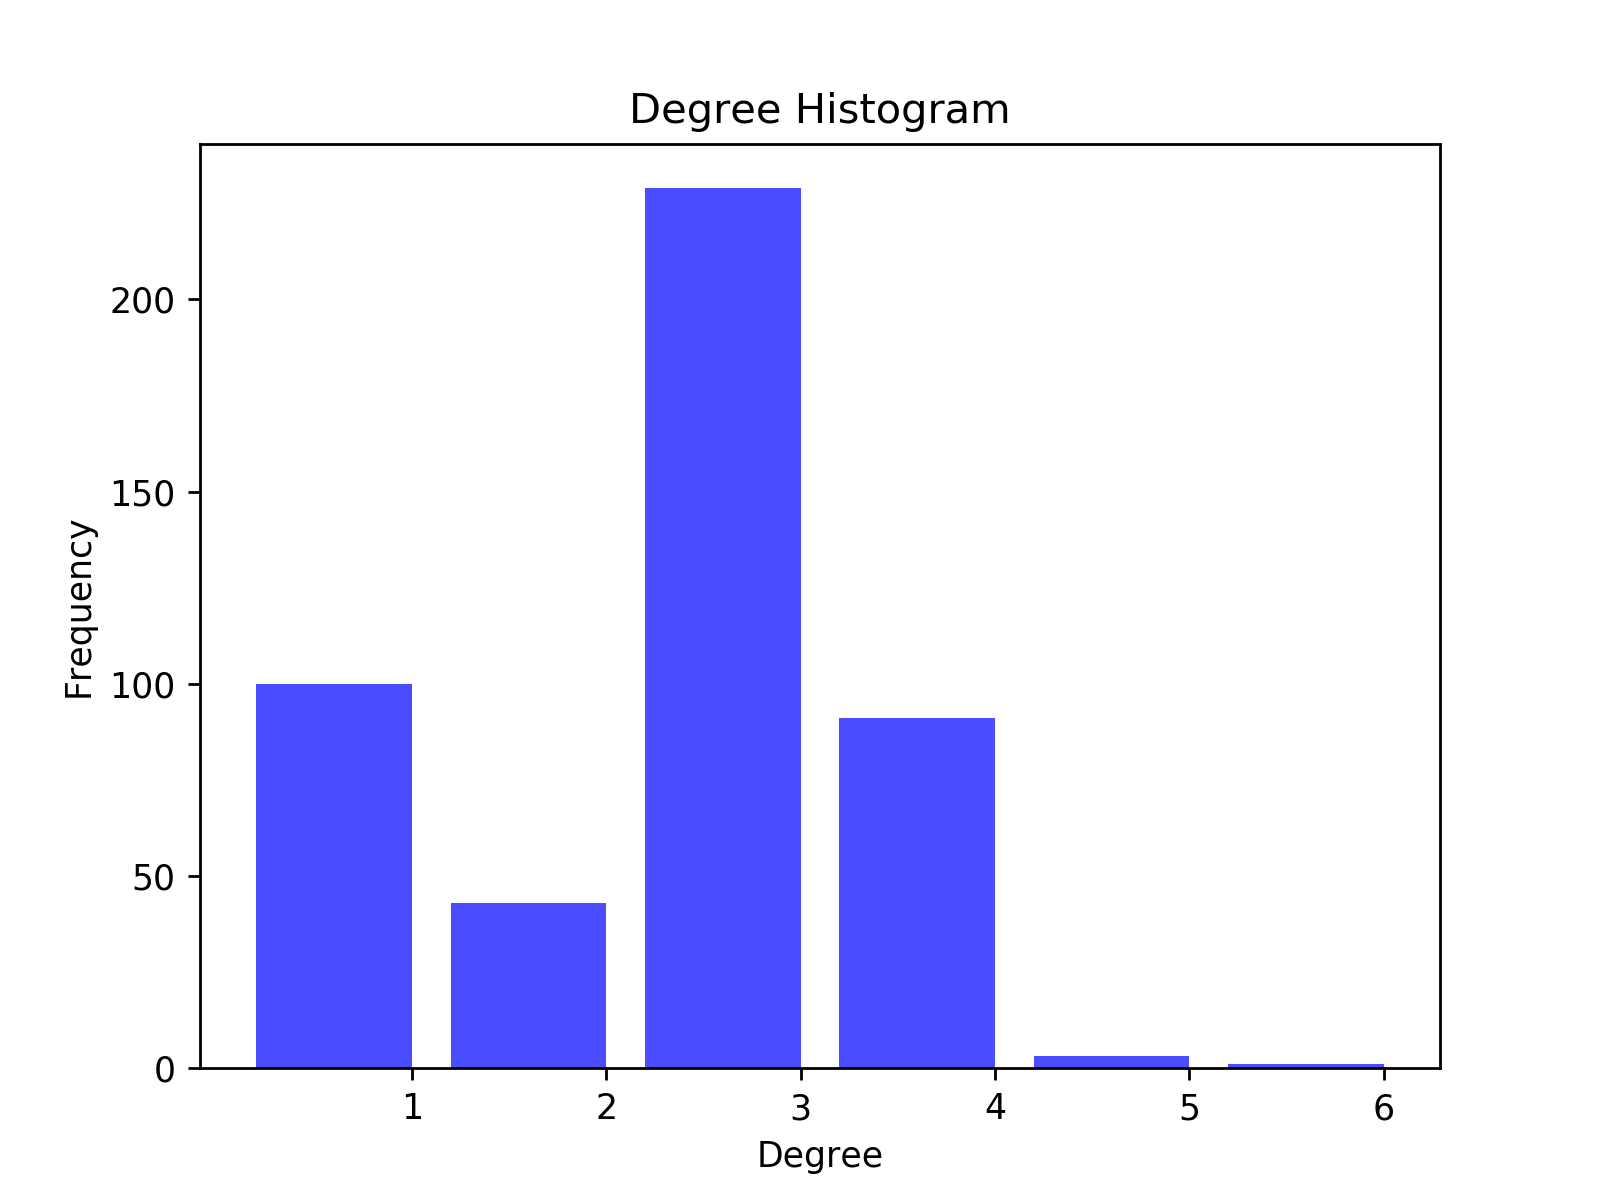

In [119]:
#  The histogram of the frequency of the degree of the nodes in the sub-area of the network.
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b', alpha=0.7)

plt.title("Degree Histogram")
plt.ylabel("Frequency")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
# nx.draw_networkx_nodes(G, pos, node_size=20)
# nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [76]:
#diameter, transitivity, periphery, radius, center for the giant connected component graph
Gc = max(nx.connected_component_subgraphs(G), key=len)
print(nx.diameter(Gc))
print(nx.transitivity(Gc))
print(nx.periphery(Gc))

print(nx.radius(Gc))
print(nx.center(Gc))

29
0.045627376425855515
[291552, 294140, 291565, 310529, 310963, 326571]
16
[302920, 303538]


#### plotting the network of identified nodes with high betweenness centrality.

In [17]:
# G.neighbors(316474)
[n for n in G.neighbors(316474)]

[309364, 316329, 317479, 322740]

In [18]:
# G.neighbors(314989)
[n for n in G.neighbors(314989)]

[309231, 315104, 316329]

d:\programfiles\miniconda3\envs\tensor1\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


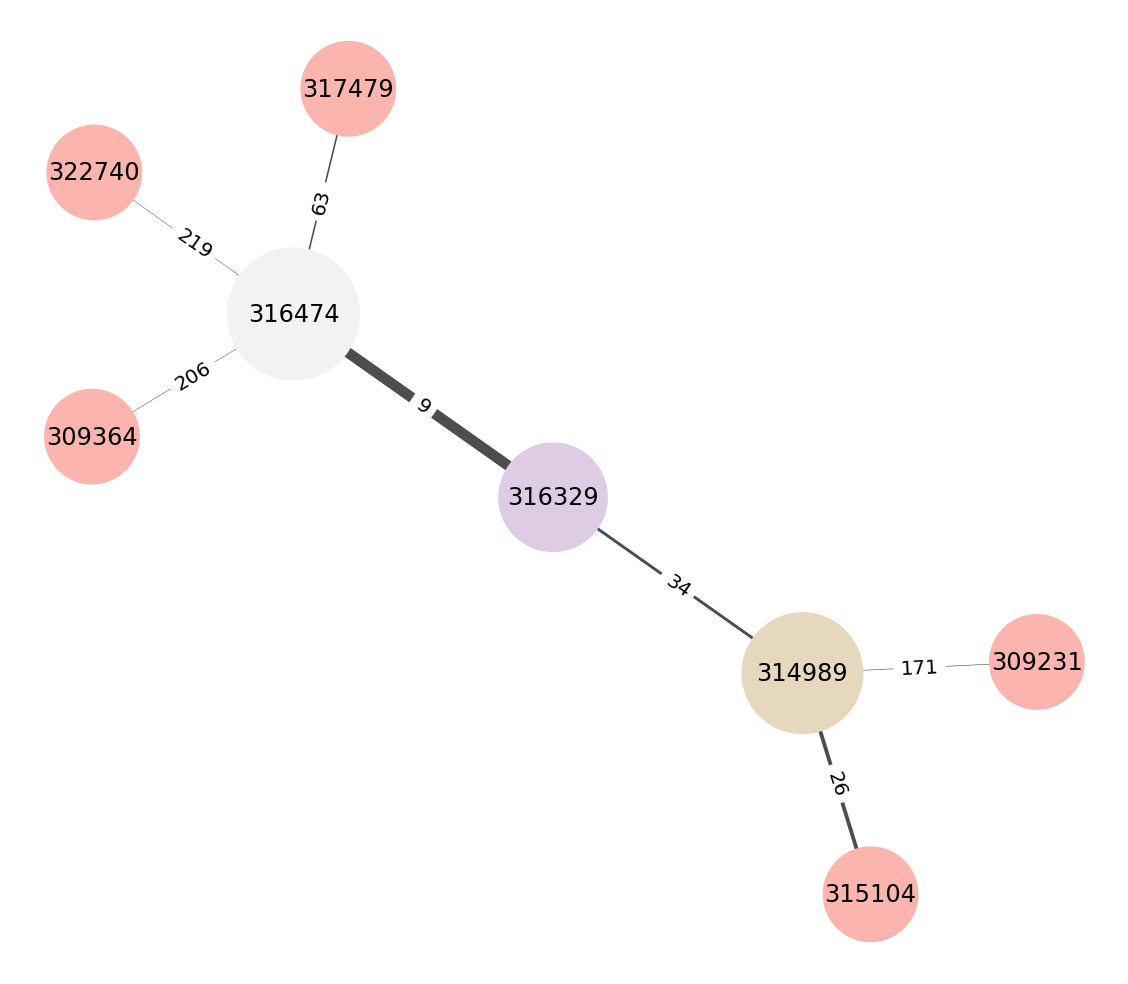

In [20]:
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


# Draw the graph using the random layout
H=G.subgraph([317479,322740,316474,309364,316329, 314989,309231, 315104, 316329]) 
node_color = [H.degree(v) for v in H]
node_size = [700*H.degree(v)+1500 for v in H]
edge_width = [50*(1/H[u][v]['LENGTH']) for u,v in H.edges()]
edge_labels = dict([((u, v,), round(H[u][v]['LENGTH'])) for u, v, d in H.edges(data=True)])
plt.figure(figsize=(8,7))
pos = nx.spring_layout(H)
nx.draw_networkx(H, pos, node_size=node_size, 
                 node_color=node_color, alpha=1, with_labels=True, 
                 width=edge_width, edge_color='0.3', cmap=plt.cm.Pastel1)
nx.draw_networkx_edge_labels(H,pos, edge_labels=edge_labels,  label_pos=0.5)
plt.axis('off')
plt.tight_layout();

In [21]:
# average clustering coefficient for all the network 
nx.average_clustering(G)

0.04111349036402569

<IPython.core.display.Javascript object>


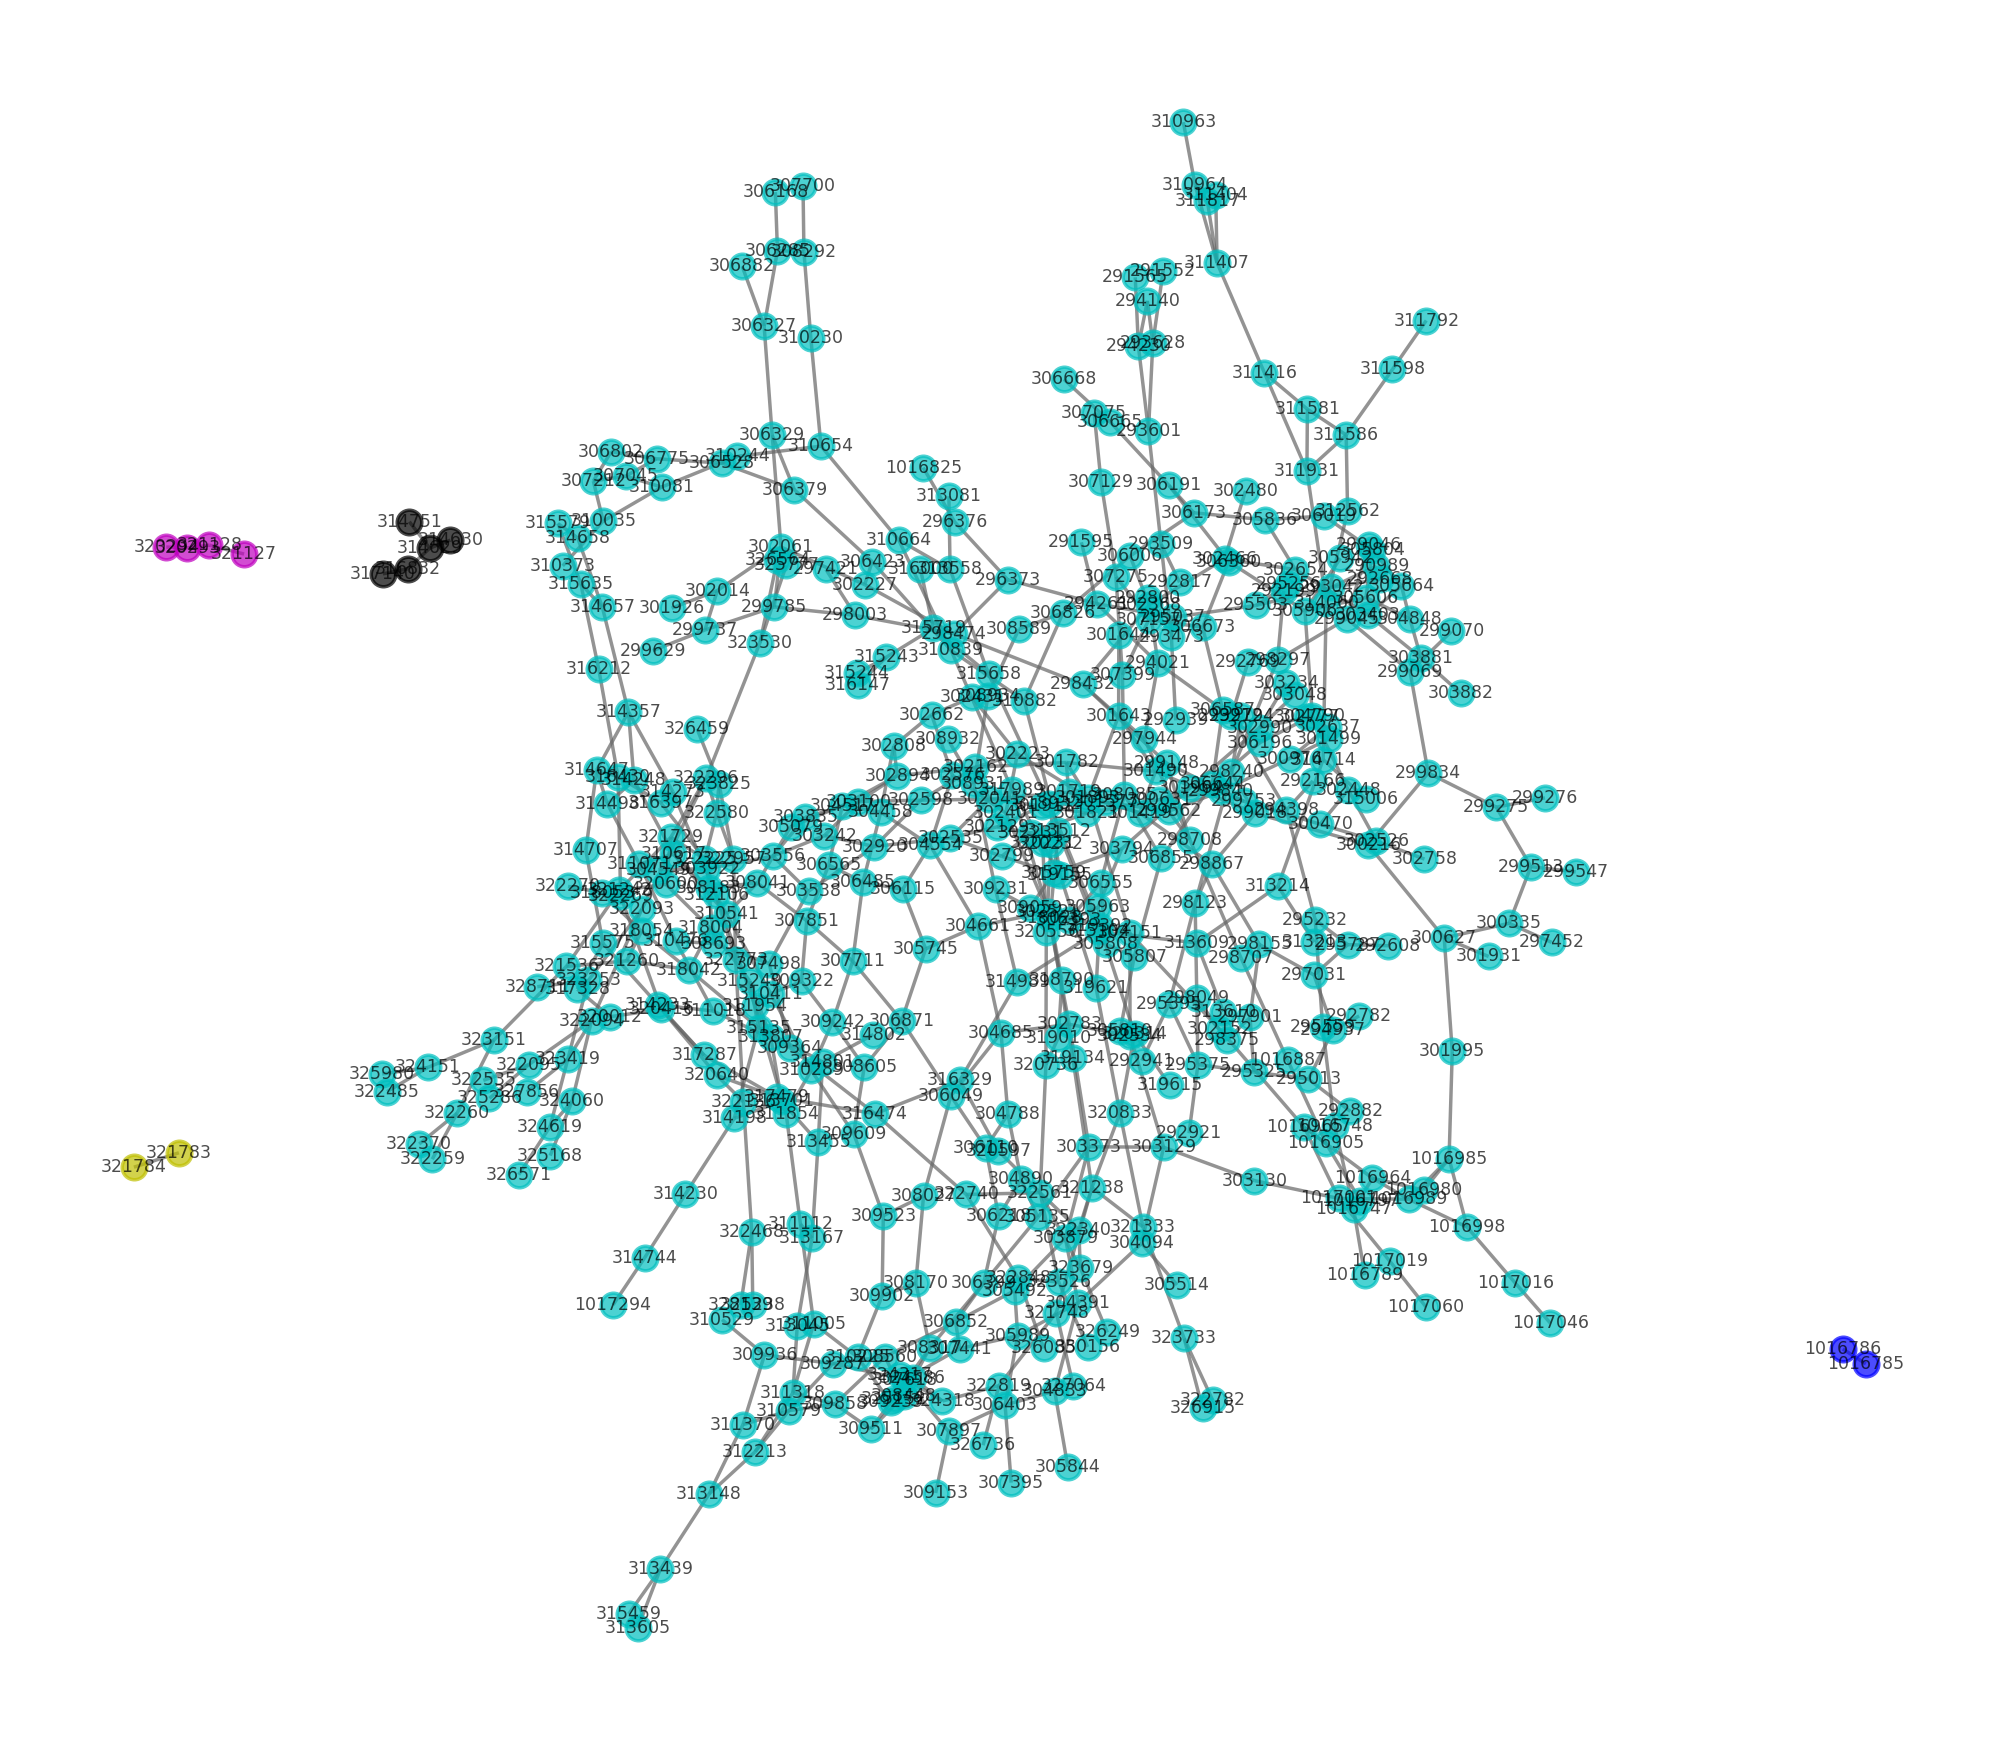

In [183]:
# plotting all the components in the sub area network.
# draw the graph using the default spring layout
plt.figure(figsize=(8,7))

colorlist = [ 'c', 'k', 'm', 'y', 'b' ,'r']
wcc = nx.connected_component_subgraphs( G )
for index, sg in enumerate(wcc):  #there's probably a more elegant approach using zip
    nx.draw_networkx(sg,pos=nx.fruchterman_reingold_layout(G), node_size=50, font_size=5, 
                  node_color=colorlist[index] ,edge_cmap =plt.cm.Blues,width=1,alpha=0.7, edge_color='0.4' )
plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


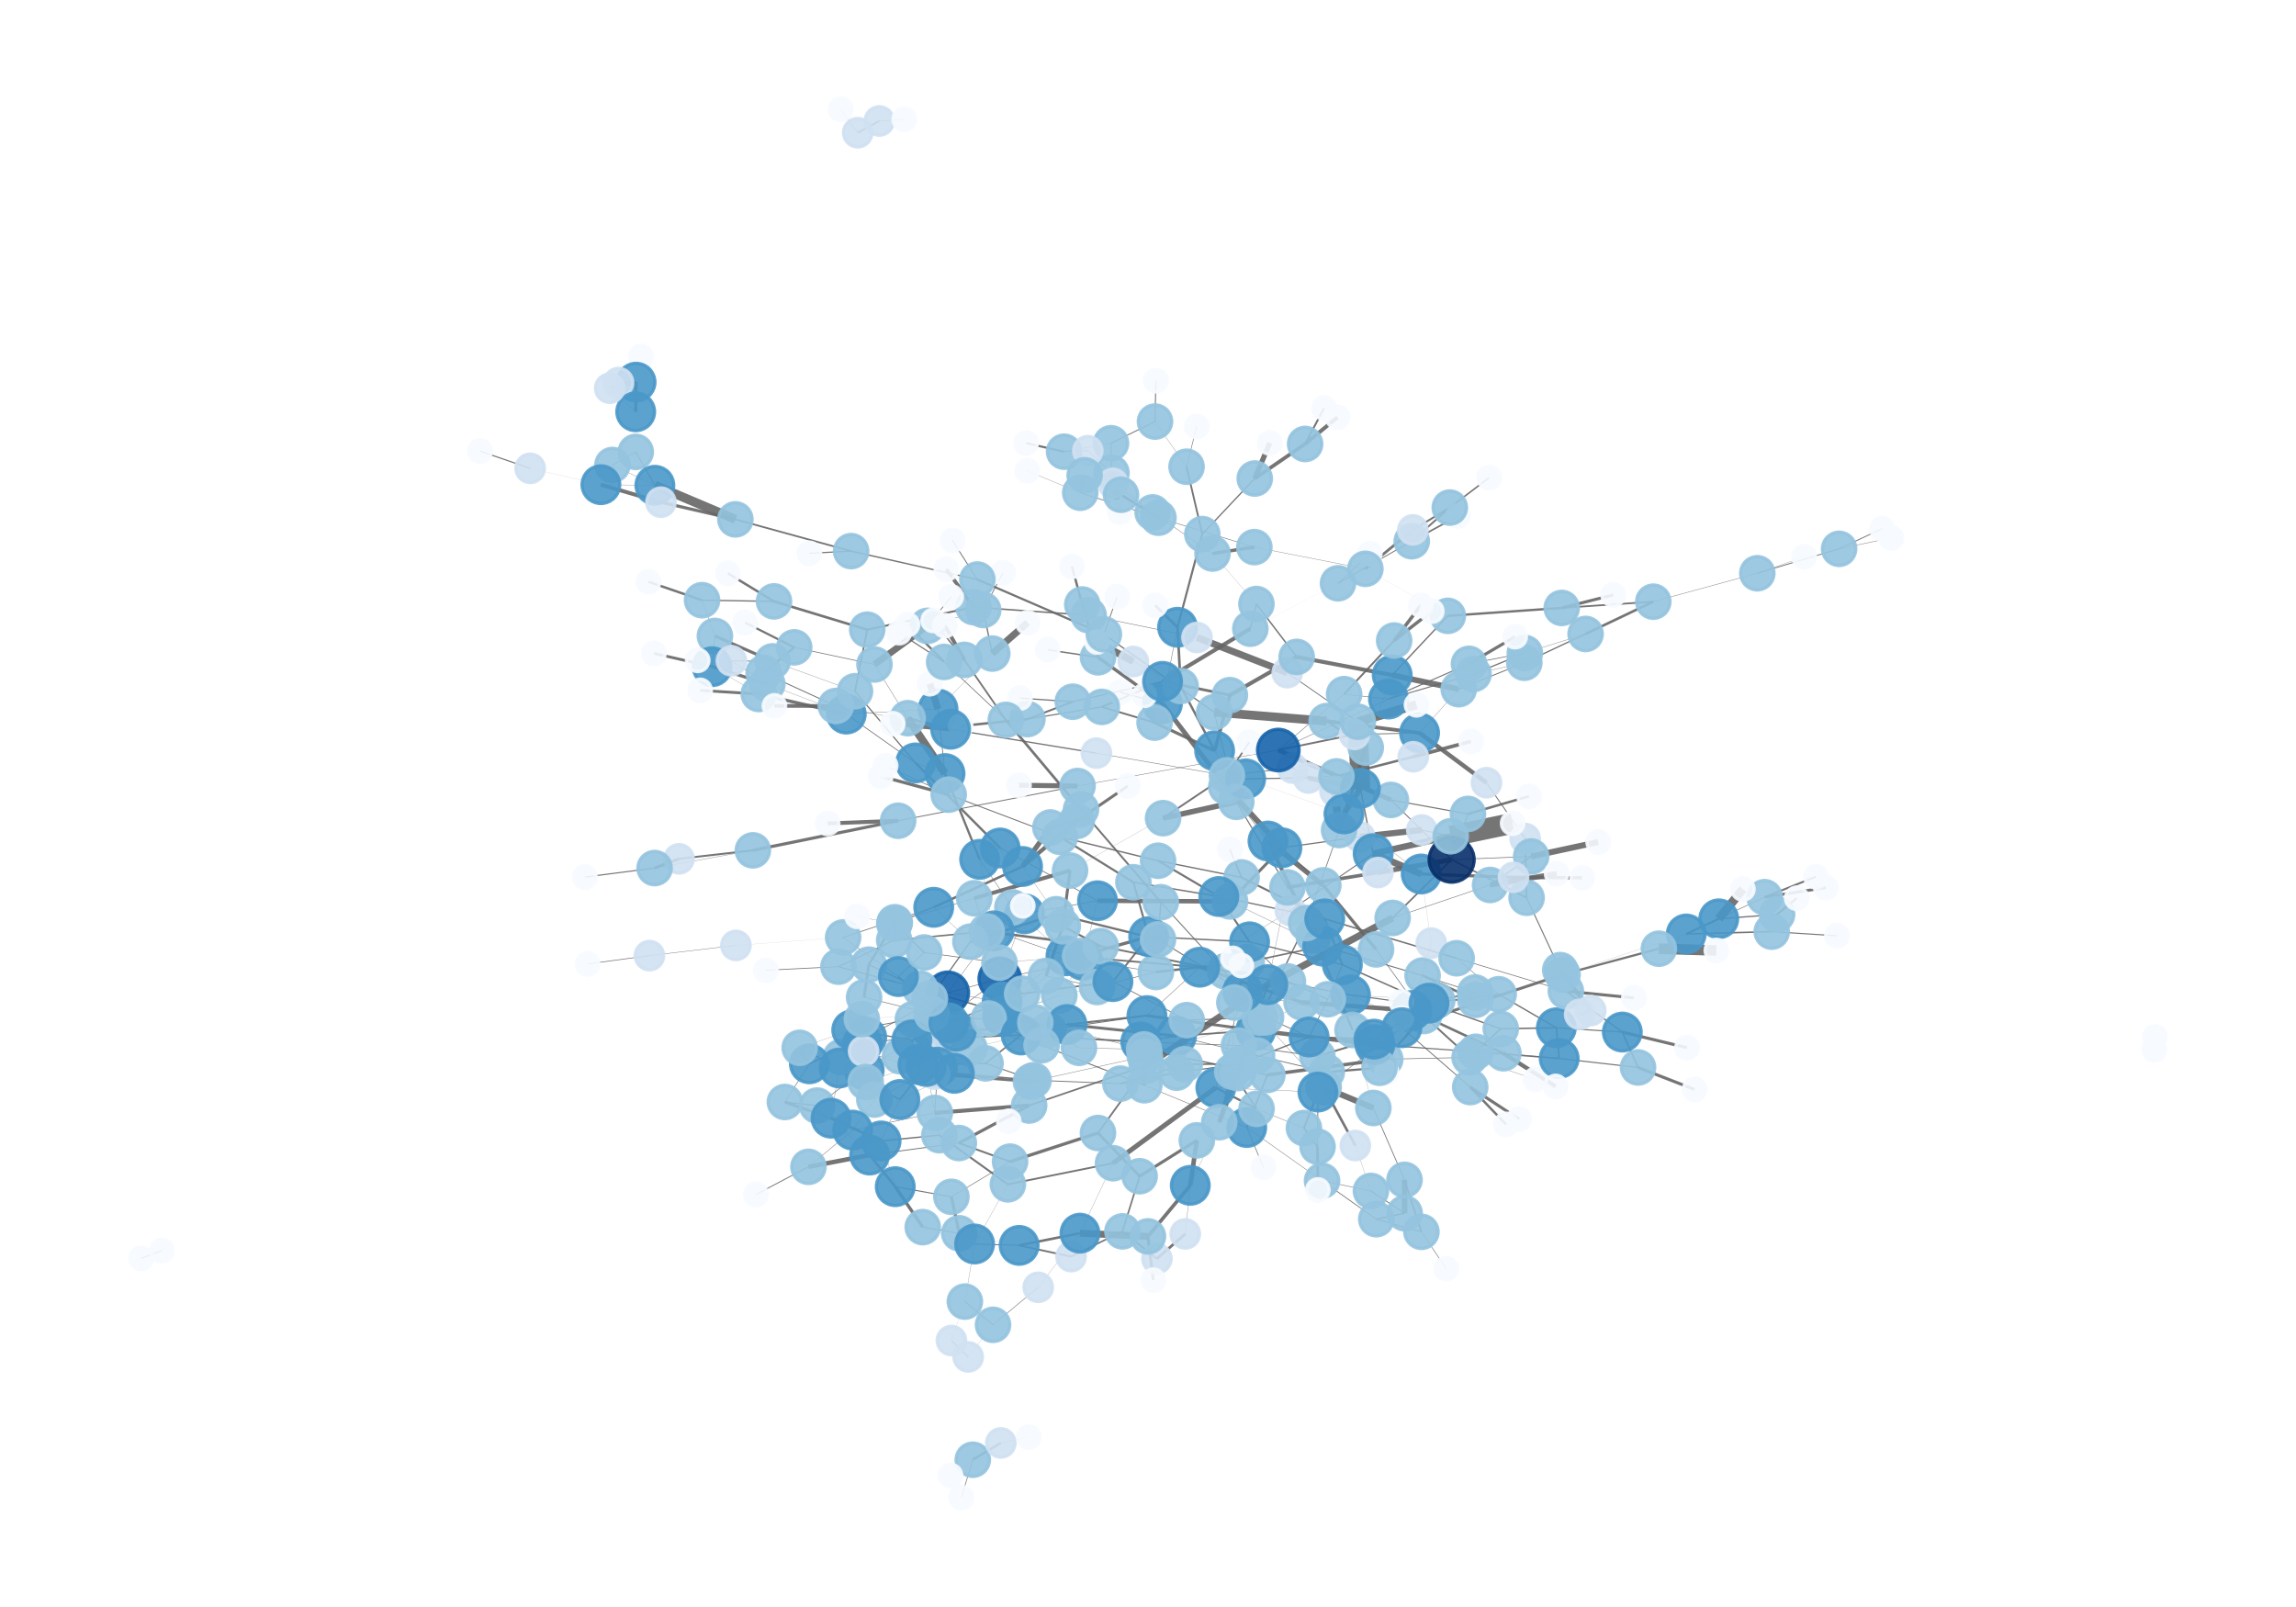

In [131]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [30*G.degree(v)+20 for v in G]
edge_width = [0.01*G[u][v]['LENGTH'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.9, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();